# EXAMPLE 1:  
## 3D Laplace, cubic grid, finite diference discretization, KDTree permutation<u>

Additional requirements:

* [sklearn](http://scikit-learn.org/stable/install.html) 

In [1]:
# Imports:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ce.ce_wrap import h2_dir, prec_gmres
from helpers.fd_tools import gen_3d_lap, make_coord
from helpers.prms import kdt_prm

In [2]:
# Set the matrix size:
p = 10
N = 2**p

# Generate random right-hand side:
rhs = np.random.randn(N)*1.

# Generate 3D Laplacian matrix:
A = gen_3d_lap(p)

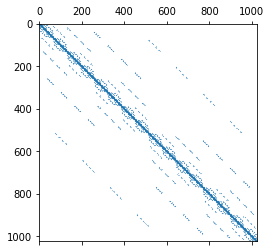

In [3]:
# Set the block size for the permutation:
B = 16

# Build a permutation using KDTree from sklearn:
coord = make_coord(p)
prm, bl_ar = kdt_prm(coord, B=B)
A_prm = A[:, prm][prm, :]

# Show permuted matrix:
plt.spy(A_prm,markersize=0.1)

In [4]:
# Set the number of levels in ce factorization:
level = 2

# Apply ce factorization:
sol, info = h2_dir(A_prm, rhs, bl_ar=bl_ar, level=level, r=2, join=B)
time, mem, res, error = info
print "N:", N, "\nCE factor. time:", time[0], "s,", "\nCE solution time:", time[1], "s,","\nMemory:", mem, "MB", "\nResidual", res, "\nError", error

N: 1024 
CE factor. time: 0.023127 s, 
CE solution time: 0.001562 s, 
Memory: 2 MB 
Residual 0.025121099162 
Error 0.0357503901362


# EXAMPLE 2: 
## Poisson equation, complex domain, finite elements discretization, metis permutation

Additional requirements:

* [FEniCS](https://fenicsproject.org/) 
* [mshr](https://bitbucket.org/fenics-project/mshr) 
* [METIS for Python](https://metis.readthedocs.io/en/latest/)
* [NetworkX](https://networkx.github.io/)

In [10]:
# Imports:
from helpers.fe_mat import complex_mesh_3d
from helpers.prms import metis_prm

In [11]:
# Build mesh, matrix and right-hand side with FEniCS 
mesh, A, rhs = complex_mesh_3d(r=10)
N =  A_prm.shape[0]

In [12]:
# Set the block size for permutation:
B = 16

# Build permutation with Metis 
prm, bl_ar = metis_prm(A, B=B)
A_prm = A[:, prm][prm, :]

In [14]:
# Set the number of levels in ce factorization:
level = 2

# Apply ce factorization:
sol, info = h2_dir(A_prm, rhs, bl_ar=bl_ar, level=level, r=2, join = B)
time, mem, res, error = info
print "N:", N, "\nCE factor. time:", time[0], "s,", "\nCE solution time:", time[1], "s,","\nMemory:", mem, "MB", "\nResidual", res, "\nError", error

N: 1024 
CE factor. time: 0.009427 s, 
CE solution time: 0.000185000000002 s, 
Memory: 1 MB 
Residual 1.03761054315e-05 
Error 0.000107609921367
